# Dog vs Cat

**Competition Description**

In this competition, you'll write an algorithm to classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult.

In [1]:
from IPython.display import Image
Image(url= "https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg")

## Collecting the Data¶

training data set and testing data set are given by Kaggle you can download from kaggle directly

link-https://www.kaggle.com/c/dogs-vs-catsdata

## Data Preprocessing

In [2]:
import numpy as np
import os
from random import shuffle
from PIL import Image ,ImageOps
import pandas as pd


In [3]:
train_dir='E:\\data\\dog vs cat\\train'

**We have to extract the target variable if it is cat or dog and label them accordingly**

In [4]:
def label_images(img):
    word_label=img.split('.')[-3]
    #if word_label == 'dog ': return 1
    if word_label == 'cat': return 0
    else : return 1

In [5]:
def extract_lables():
    
    train_label=[]
    for img in os.listdir(train_dir):
        label=label_images(img)
        
        train_label.append(np.array(label))

    return train_label
    

In [6]:
train_lables=extract_lables()
train_lables=np.array(train_lables)
train_lables

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
from tensorflow.keras.utils import to_categorical
to_categorical(train_lables)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

**We have extracted the target variable and made a data frame of it**

In [8]:
df_label=pd.DataFrame(train_lables,columns=['target'])
df_label

,target
0,0
1,0
2,0
3,0
4,0
...,...
24995,1
24996,1
24997,1
24998,1


**Now we have to extract the pixel values of data so that we can feed it to the CNN model firstly we resize the image to a 50*50 image then we have to convert it into gray scale after which we convert it into a 1d array for all the images to  feed into our CNN**

In [9]:
def extract_pixcels():
    train_data=[]
   
    for img in os.listdir(train_dir):
        
        path=os.path.join(train_dir,img)
        img = Image.open(path)
        size=(50,50)
        img= img.resize(size)
        img=ImageOps.grayscale(img)
        img=np.array(img)
        img=img.flatten()
        img=np.array(img)
        train_data.append(img)
      
    
    return train_data

In [10]:
train_data=extract_pixcels()
train_data=np.array(train_data)
train_data

array([[171, 179, 186, ...,   2,   2,   2],
       [ 41,  48,  42, ...,  59,  58,  40],
       [ 42,  49,  55, ..., 143, 164, 164],
       ...,
       [ 43,  50,  55, ..., 138, 136, 146],
       [251, 239, 206, ..., 106, 111, 116],
       [246, 246, 244, ..., 254, 254, 254]], dtype=uint8)

We first convert the values of pixels between 0 and 1 by dividing it by 255

In [11]:
train_data=train_data/255

In [12]:

x = train_data.reshape(-1, 50, 50, 1)

**Now we represent the data in form of a data frame so that we can feed it to our CNN**

In [13]:
import pandas as pd
df=pd.DataFrame(train_data)
df

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.670588,0.701961,0.729412,0.756863,0.772549,0.788235,0.803922,0.815686,0.827451,0.847059,...,0.070588,0.074510,0.054902,0.035294,0.015686,0.015686,0.011765,0.007843,0.007843,0.007843
1,0.160784,0.188235,0.164706,0.180392,0.188235,0.188235,0.156863,0.164706,0.152941,0.172549,...,0.203922,0.211765,0.231373,0.231373,0.192157,0.207843,0.219608,0.231373,0.227451,0.156863
2,0.164706,0.192157,0.215686,0.227451,0.223529,0.219608,0.215686,0.207843,0.192157,0.188235,...,0.298039,0.290196,0.286275,0.286275,0.419608,0.576471,0.580392,0.560784,0.643137,0.643137
3,0.870588,0.878431,0.905882,0.901961,0.890196,0.894118,0.898039,0.894118,0.890196,0.882353,...,0.976471,0.956863,0.941176,0.909804,0.890196,0.843137,0.796078,0.827451,0.858824,0.831373
4,0.419608,0.396078,0.337255,0.470588,0.576471,0.615686,0.803922,0.878431,0.737255,0.925490,...,0.372549,0.388235,0.364706,0.372549,0.380392,0.337255,0.321569,0.396078,0.364706,0.329412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.552941,0.564706,0.576471,0.580392,0.584314,0.592157,0.596078,0.600000,0.607843,0.619608,...,0.627451,0.635294,0.639216,0.639216,0.643137,0.643137,0.650980,0.654902,0.658824,0.662745
24996,0.352941,0.349020,0.388235,0.372549,0.345098,0.298039,0.301961,0.352941,0.356863,0.380392,...,0.176471,0.247059,0.274510,0.321569,0.352941,0.364706,0.349020,0.313725,0.352941,0.325490
24997,0.168627,0.196078,0.215686,0.200000,0.160784,0.176471,0.203922,0.188235,0.400000,0.435294,...,0.615686,0.654902,0.415686,0.556863,0.533333,0.521569,0.458824,0.541176,0.533333,0.572549
24998,0.984314,0.937255,0.807843,0.568627,0.392157,0.349020,0.341176,0.364706,0.321569,0.317647,...,0.454902,0.396078,0.364706,0.380392,0.396078,0.407843,0.411765,0.415686,0.435294,0.454902


In [14]:
 final=pd.concat([df, df_label], axis=1)

In [15]:
final

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,target
0,0.670588,0.701961,0.729412,0.756863,0.772549,0.788235,0.803922,0.815686,0.827451,0.847059,...,0.074510,0.054902,0.035294,0.015686,0.015686,0.011765,0.007843,0.007843,0.007843,0
1,0.160784,0.188235,0.164706,0.180392,0.188235,0.188235,0.156863,0.164706,0.152941,0.172549,...,0.211765,0.231373,0.231373,0.192157,0.207843,0.219608,0.231373,0.227451,0.156863,0
2,0.164706,0.192157,0.215686,0.227451,0.223529,0.219608,0.215686,0.207843,0.192157,0.188235,...,0.290196,0.286275,0.286275,0.419608,0.576471,0.580392,0.560784,0.643137,0.643137,0
3,0.870588,0.878431,0.905882,0.901961,0.890196,0.894118,0.898039,0.894118,0.890196,0.882353,...,0.956863,0.941176,0.909804,0.890196,0.843137,0.796078,0.827451,0.858824,0.831373,0
4,0.419608,0.396078,0.337255,0.470588,0.576471,0.615686,0.803922,0.878431,0.737255,0.925490,...,0.388235,0.364706,0.372549,0.380392,0.337255,0.321569,0.396078,0.364706,0.329412,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.552941,0.564706,0.576471,0.580392,0.584314,0.592157,0.596078,0.600000,0.607843,0.619608,...,0.635294,0.639216,0.639216,0.643137,0.643137,0.650980,0.654902,0.658824,0.662745,1
24996,0.352941,0.349020,0.388235,0.372549,0.345098,0.298039,0.301961,0.352941,0.356863,0.380392,...,0.247059,0.274510,0.321569,0.352941,0.364706,0.349020,0.313725,0.352941,0.325490,1
24997,0.168627,0.196078,0.215686,0.200000,0.160784,0.176471,0.203922,0.188235,0.400000,0.435294,...,0.654902,0.415686,0.556863,0.533333,0.521569,0.458824,0.541176,0.533333,0.572549,1
24998,0.984314,0.937255,0.807843,0.568627,0.392157,0.349020,0.341176,0.364706,0.321569,0.317647,...,0.396078,0.364706,0.380392,0.396078,0.407843,0.411765,0.415686,0.435294,0.454902,1


NUMBER OF PIXELS =5625

NUMBER OF SAMPLES=25000

## Data Visulization



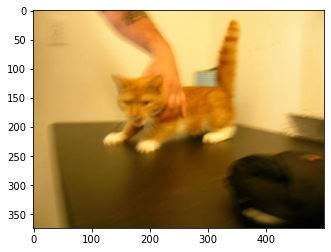

In [39]:
#showing an image 
import matplotlib.pyplot as plt
for img in os.listdir(train_dir):
    path=os.path.join(train_dir,img)
    img = Image.open(path)
    plt.imshow(img)
    break

In [47]:
train_lables

array([0, 0, 0, ..., 1, 1, 1])

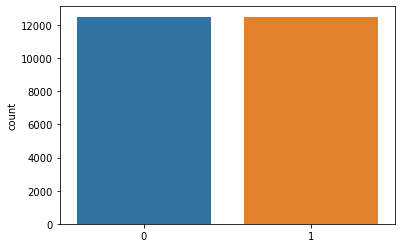

In [46]:
import seaborn as sns
ax = sns.countplot(x=train_lables)

## Creating a Convulutional Neural Network

In [16]:
#importing all the required libraires

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [33]:
input_shape=(50,50,1)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy', 
              optimizer='Adam',
              metrics=['accuracy'])

In [35]:
x.shape

(25000, 50, 50, 1)

In [36]:
train_lables.shape

(25000,)

In [37]:
model.fit(x,train_lables,epochs=20)

Epoch 1/20
782/782 [==============================] - 50s 64ms/step - loss: 0.5960 - accuracy: 0.6682
Epoch 2/20
782/782 [==============================] - 49s 62ms/step - loss: 0.4776 - accuracy: 0.7695
Epoch 3/20
782/782 [==============================] - 47s 61ms/step - loss: 0.4136 - accuracy: 0.8081
Epoch 4/20
782/782 [==============================] - 49s 62ms/step - loss: 0.3625 - accuracy: 0.8364
Epoch 5/20
782/782 [==============================] - 47s 60ms/step - loss: 0.3174 - accuracy: 0.8616
Epoch 6/20
782/782 [==============================] - 46s 58ms/step - loss: 0.2685 - accuracy: 0.8866
Epoch 7/20
782/782 [==============================] - 47s 60ms/step - loss: 0.2307 - accuracy: 0.90391s
Epoch 8/20
782/782 [==============================] - 46s 59ms/step - loss: 0.1879 - accuracy: 0.9233
Epoch 9/20
782/782 [==============================] - 46s 59ms/step - loss: 0.1512 - accuracy: 0.9388
Epoch 10/20
782/782 [==============================] - 46s 58ms/step - loss: 0.1

We have got an accuraccy of **99** on the training data set

I didnt split the data initially for testing so we are not able to perform testing